## Supervivencia en el Titanic

Vamos a analizar algunos factores que tuvieron una gran influencia entre los pasajerons que sobrevivieron.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [5]:
df_titanic["alive"].value_counts()

alive
no     549
yes    342
Name: count, dtype: int64

In [4]:
df_titanic["who"].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [6]:
df_titanic["pclass"].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [7]:
df_titanic["embark_town"].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

### Análisis

En un primer vistazo, vemos que hay un total de 891 datos de pasajeros.
- De ellos, 549 sobrevivieron, y 342 fallecieron.
- Entre los viajeros, 537 eran hombres, 271 eran mujeres y 83 eran niños.
- En primera clase, viajaban 216 personas; en segunda clase, 184; en tercera clase, 491 personas.
- 644 pasajeros embarcaron desde Southampton; 168 desde Cherbourg, y 77 desde Queenstown.

#### 1. El titanic fue un accidente con una tasa de mortalidad alta:

Cerca del 62% de personas sobrevivieron, frente al 38% que no sobrevivieron.


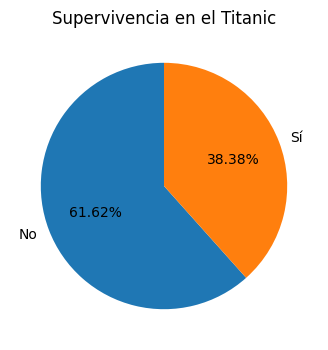

In [26]:
# 1. gráfico de mortalidad
data = df_titanic["survived"].value_counts()

labels = data.index.map({0: "No", 1: "Sí"}) # con labels se mapea el indice y solo cambia los valores 0-1 en el gráfico
fig,ax = plt.subplots(1,1,figsize = (4,4))
ax.pie(data.values,
        labels=labels,
        autopct='%.2f%%',
        startangle= 90)

plt.title("Supervivencia en el Titanic")
plt.show()
fig.savefig("./image/tarta_supervivencia_titanic.png")
plt.close(fig);

### 2. Los datos apoyan que se dio el "Las mujeres y los niños primero"...

Y esto se puede apreciar claramente en este gráfico. Quienes más sobrevivieron fueron las mujeres y los niños, respecto a los hombres.

In [9]:
# 2. Sobrevivientes mujeres y niños primero

# Obtenemos las frecuencias absolutas y relativas de la variable/columna "who" del dataset df_titanic

frecuencias_absolutas = df_titanic["who"].value_counts()
frecuencias_relativas = df_titanic["who"].value_counts(normalize = True) *  100

print(frecuencias_absolutas)
print(frecuencias_relativas)

who
man      537
woman    271
child     83
Name: count, dtype: int64
who
man      60.269360
woman    30.415264
child     9.315376
Name: proportion, dtype: float64


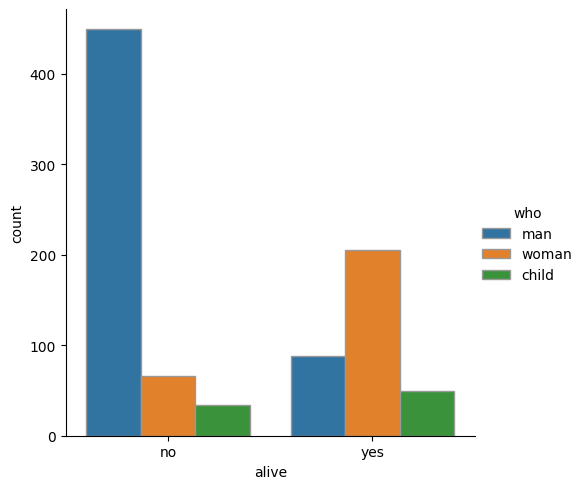

In [12]:
# vemos quienes sobrevivieron respecto a mujeres, niños y hombres:

grafico_supervivencia = sns.catplot(
    x="alive",
    hue = "who",
    kind="count",
    edgecolor=".6",
    orient = "V",
    data=df_titanic);

plt.show()
grafico_supervivencia.fig.savefig("./image/barras_supervivencia_por_persona_clase.png")
plt.close(grafico_supervivencia.fig)

### 3. La clase en la que viajases tuvo una influencia significativa:

Como vemos, de las personas que viajaban en **primera y segunda clase**, la tasa de supervivencia de mujeres y niños fue muy alta frente al número de fallecidos que hubo, pues la cantidad de ellos fue baja frente a los supervivientes. En **tercera clase**, desafortunadamente murieron más mujeres y niños de los que sobrevivieron. Además de esto, en todas las clases, la mortalidad de los hombres fue siempre mayor a quienes sobrevivieron. 


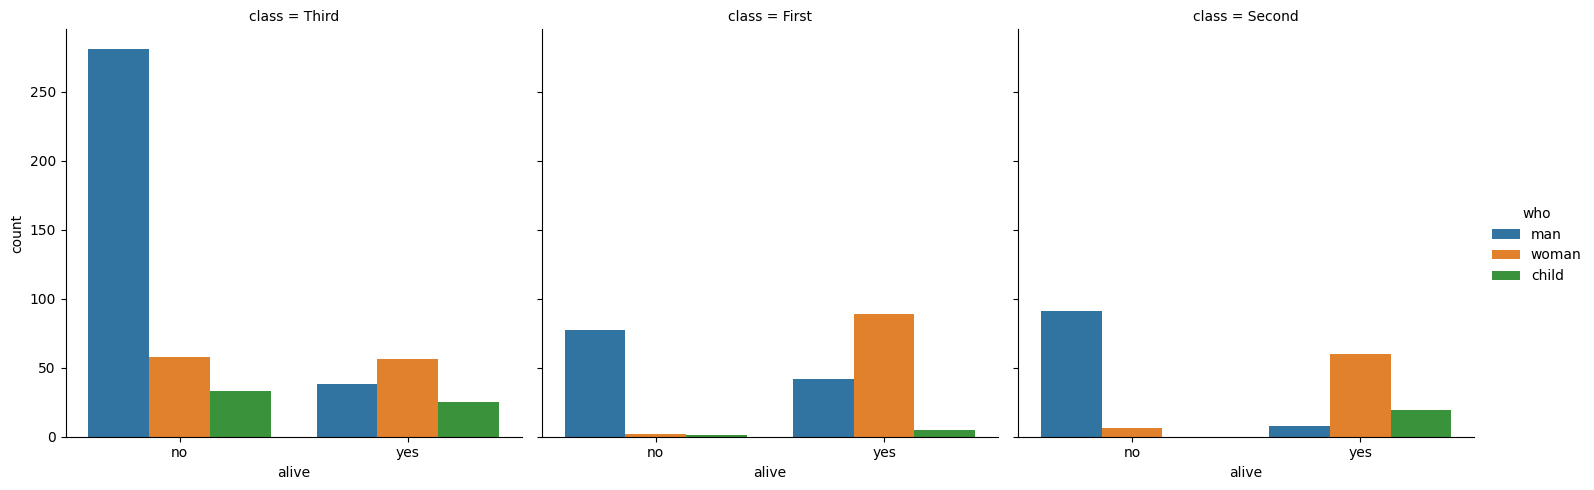

In [14]:
# 3. Y vemos quienes sobrevivieron respecto a las clases:
grafico_clases = sns.catplot(
    x= "alive", 
    col = "class", 
    hue = "who", 
    data = df_titanic, 
    kind = "count");

plt.show()
grafico_clases.fig.savefig("./image/barras_supervivencia_por_persona_clase.png")
plt.close(grafico_clases.fig)

### 4. Y podría explicar las diferencias entre tasas de supervivencia de mujeres y niños:
Así vemos que sobrevivieron muchas más mujeres y niños que los que fallecieron. Y respecto a los hombres que viajaban, fallecieron cuatro veces más hombres que los que sobrevivieron.  



In [15]:
# 4. las diferencias entre tasas de supervivencia de mujeres y niños.
# who y alive:

tabla_contingencia = pd.crosstab(df_titanic["who"],
                                 df_titanic["alive"],
                                 margins=False)
tabla_contingencia

alive,no,yes
who,,
child,34,49
man,449,88
woman,66,205


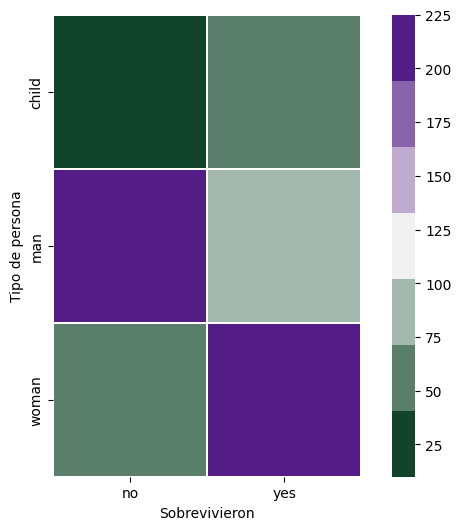

In [31]:
# mapa de calor de supervivencia 

plt.figure(figsize=(8,6))

grafico_persona = sns.heatmap(
    tabla_contingencia,
    vmin = 10,
    vmax = 225,
    cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
    square = True,
    linewidths=.1,
    annot=False);

plt.xlabel("Sobrevivieron")
plt.ylabel("Tipo de persona");
plt.show()

grafico_persona.figure.savefig("./image/mapa_calor_supervivencia_persona.png") # aqui se usa figure
plt.close(grafico_persona.figure) # figure para el ax que devuelve el heatmap;
# mi ax aqui se llama grafico_persona

### 5. Además, aunque el puerto de embarque parece tener influencia:

El gráfico muestra claramente los pasajeros que sobrevivieron según el puerto de embarque, en el siguiente orden:
- Southampton
- Cherbourg
- Queenstown

Por lo que parece que el puerto de embarque tuvo una fuerte influencia.

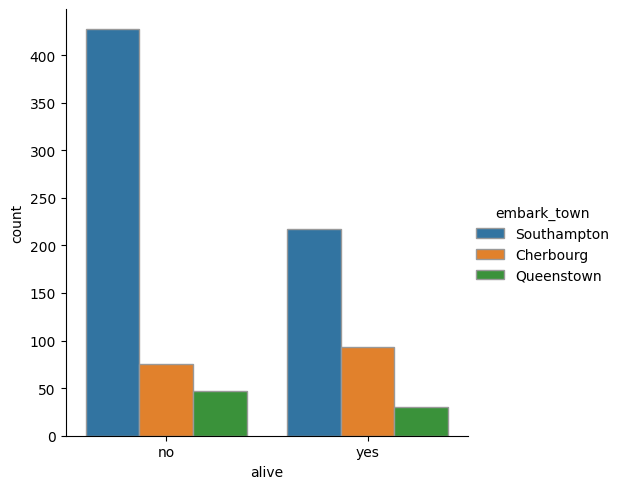

In [ ]:
# 5. Supervivencia según puerto de embarque
grafico_puerto = sns.catplot(
    x="alive",
    hue = "embark_town",
    kind="count",
    edgecolor=".6",
    orient = "V",
    data=df_titanic);

fig.suptitle("Supervivencia según el puerto de embarque");
plt.show()
grafico_puerto.fig.savefig("./image/barras_supervivencia_puerto_embarque.png")
plt.close(grafico_puerto.fig);

In [ ]:
# mapa calor alive-embark_town

tabla_cont_puerto = pd.crosstab(df_titanic["alive"],
                                 df_titanic["embark_town"],
                                 margins=False)
tabla_cont_puerto

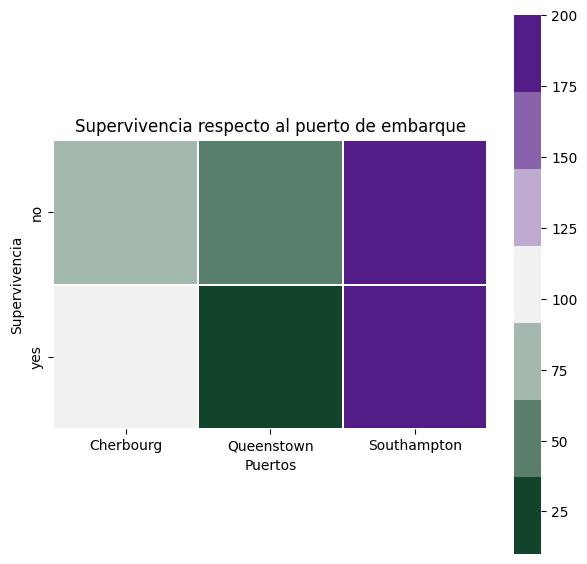

In [36]:
# mapa calor alive-embark_town

plt.figure(figsize=(7,7))
mapa_puerto = sns.heatmap(
    tabla_cont_puerto,
    vmin = 10,
    vmax = 200,
    cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
    square = True,
    linewidths=.1,
    annot=False);

plt.xlabel("Puertos")
plt.ylabel("Supervivencia");
plt.title("Supervivencia respecto al puerto de embarque")
plt.show()

mapa_puerto.figure.savefig("./image/mapa_calor_supervivencia_puerto.png") # aqui se usa figure
plt.close(mapa_puerto.figure)

## Sin embargo, si analizamos más los datos, podemos asumir que más bien fue la clase de pasaje que embarcó en cada uno de ellos:

- La mayoría de pasajeros de primera clase embarcaron desde **Southampton** y **Cherbourg**, y sobrevivieron más que los que fallecieron.
- En segunda clase, la mayoría embarcaron desde **Southampton** también; sin embargo, fallecieron más que los que sobrevivieron. La tasa de supervivencia de los pasajeros que embarcaron desde **Cherbourg** y **Queenstown** es similar.
- Entre los pasajeros de tercera clase, fallecieron muchos más los que embarcaron en **Southampton** que los que sobrevivieron; sucedió lo mismo con los pasajeros que salieron desde **Cherbourg** y **Queenstown**.

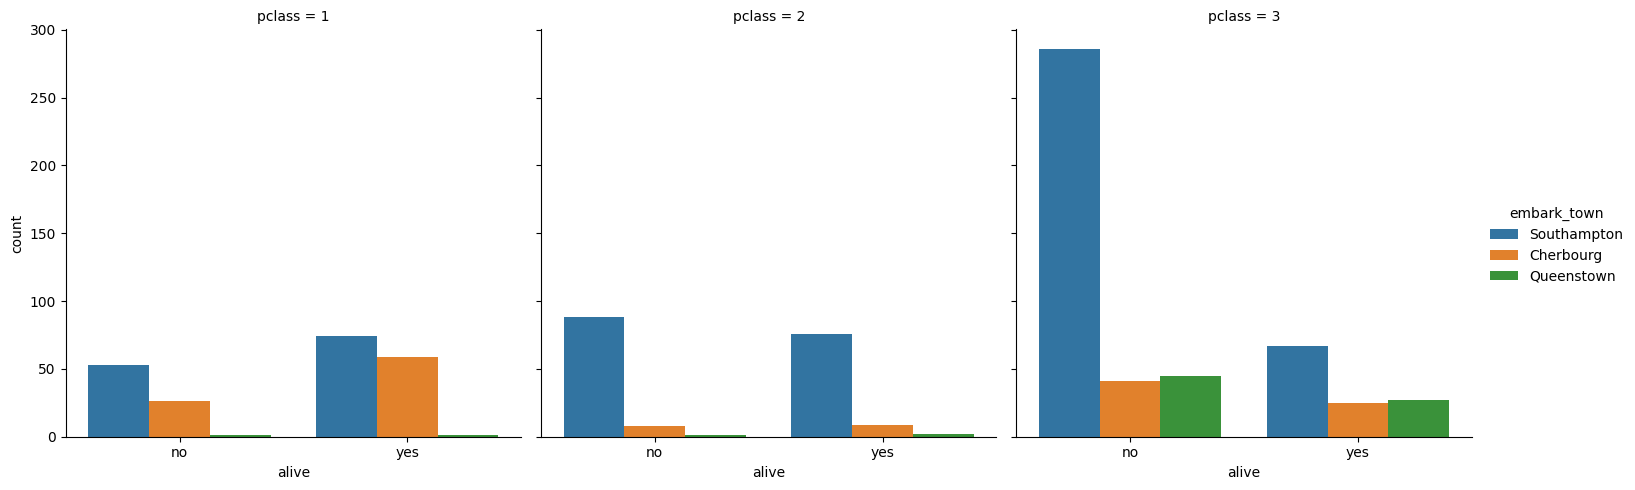

In [41]:
# supervivencia por tipo de clase del billete

grafico_billete = sns.catplot(
    x= "alive", 
    col = "pclass", 
    hue = "embark_town", 
    data = df_titanic, 
    kind = "count");

plt.show()
grafico_billete.fig.savefig("./image/barras_supervivencia_tipo_billete.png")
plt.close(grafico_billete.fig);

In [52]:
# mapas de calor:
tabla_cont_clase = pd.crosstab(df_titanic["alive"],
                                 df_titanic["pclass"],
                                 margins=False)
tabla_cont_clase

pclass,1,2,3
alive,,,
no,80,97,372
yes,136,87,119


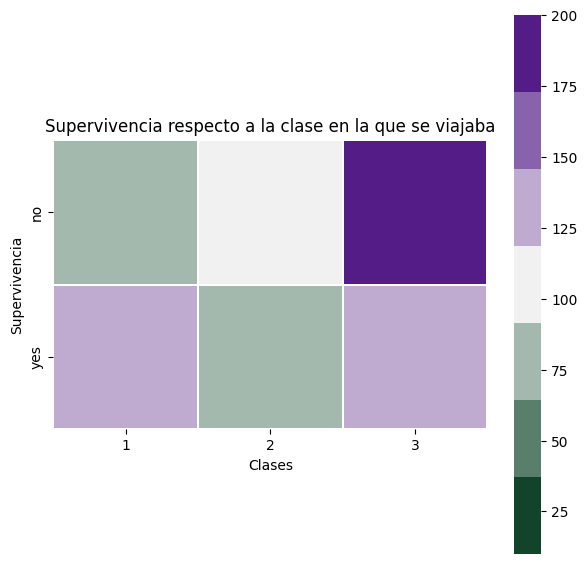

In [50]:
# mapa calor alive_pclass

tabla_cont_clase = pd.crosstab(df_titanic["alive"],
                                 df_titanic["pclass"],
                                 margins=False)
tabla_cont_clase


plt.figure(figsize=(7,7))
mapa_clases = sns.heatmap(
    tabla_cont_clase,
    vmin = 10,
    vmax = 200,
    cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
    square = True,
    linewidths=.1,
    annot=False);

plt.xlabel("Clases")
plt.ylabel("Supervivencia");
plt.title("Supervivencia respecto a la clase en la que se viajaba")
plt.show()

mapa_clases.figure.savefig("./image/mapa_calor_supervivencia_persona.png") # aqui se usa figure
plt.close(mapa_clases.figure)

Así podemos concluir que los pasajeros de **primera clase** tuvieron una tasa de supervivencia mayor que las otras dos clases.